DAY 1 – Load Dataset & Basic Exploration

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
df = iris.frame

print(df.shape)
df.head()


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


DAY 2 – Feature Distribution & Understanding

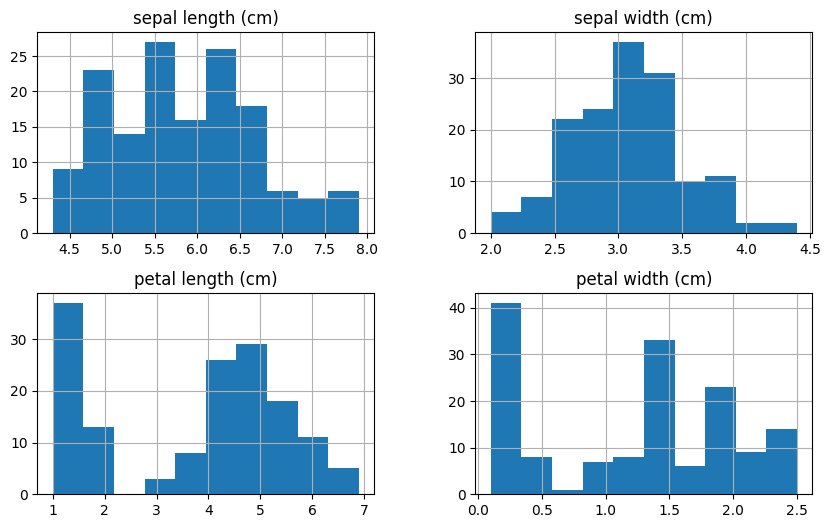

In [2]:
import matplotlib.pyplot as plt

df.iloc[:, :-1].hist(figsize=(10,6))
plt.show()


DAY 3 – Feature Scaling (Very Important)

In [3]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


DAY 4 – KMeans Clustering

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,1


DAY 5 – Elbow Method (Choosing K)

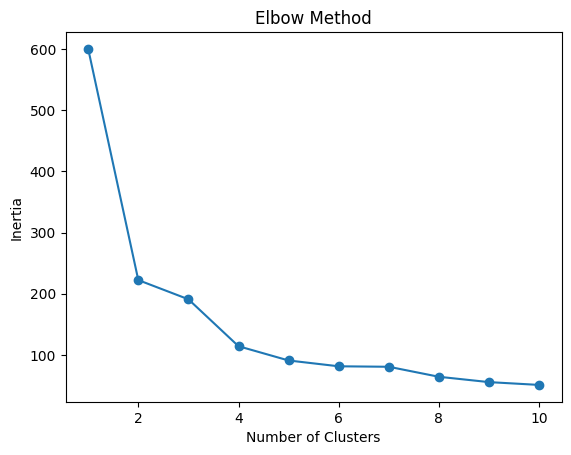

In [5]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


DAY 6 – PCA for Visualization

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]


DAY 7 – Cluster Visualization vs True Labels

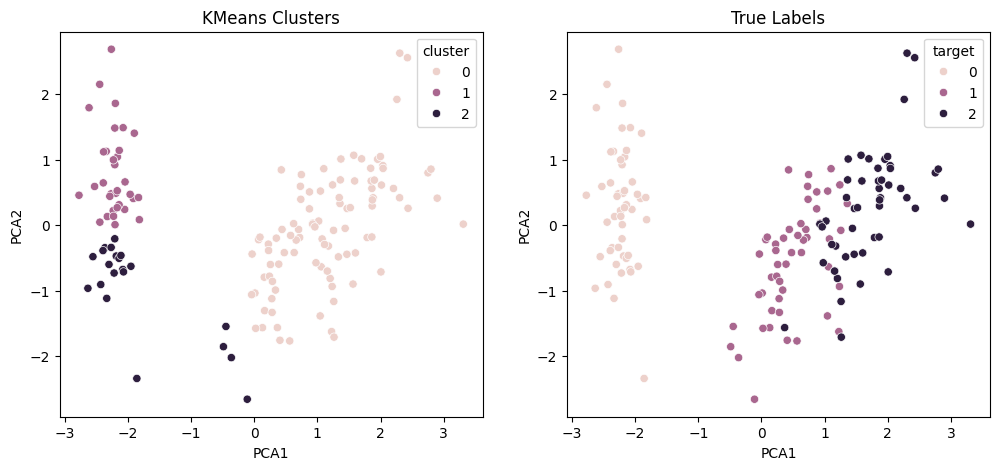

In [7]:
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df)
plt.title("KMeans Clusters")

plt.subplot(1,2,2)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=df)
plt.title("True Labels")

plt.show()
